## Задание

Дана фотография одинокого яблока крупно на очень светлом или очень темном фоне в формате JPEG.

Имя файла с фотографией вводится с клавиатуры. Какое это яблоко - зеленое, желтое, белое (очень светложелтое или светло-зеленое) или красное?

Ответ вывести названием цвета (одно слово) на русском языке в нижнем регистре.

In [1]:
from PIL import Image
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Наборы цветов

In [2]:
colorSet = {'зеленое': (95,134,55), 'желтое': (225,190,44),
            'красное': (176,68,73), 'белое': (205,205,185),
            'белый фон': (255,255,255), 'темный фон': (40,40,40)}

Загрузите изображение и выведите его на экран

In [3]:
# !gdown --folder 1VCi8k2IClU__VSRG0N_Err4fYtZc6bQb

In [4]:
filename = input('Введите имя файла (например: Лабораторная 2/1.jpg): ')
image = Image.open(filename)

Введите имя файла (например: Лабораторная 2/1.jpg):  Лабораторная 2/5.jpg


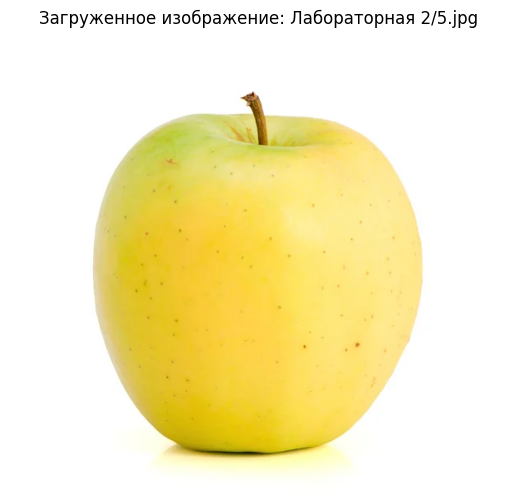

In [5]:
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f'Загруженное изображение: {filename}')
plt.show()

In [6]:
scale_factor = 0.25
new_size = (int(image.width * scale_factor), int(image.height * scale_factor))
image_small = image.resize(new_size, Image.Resampling.LANCZOS)

In [7]:
def distanse(a,b):
  r = (a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2
  return math.sqrt(r)

In [8]:
if image.mode != 'RGB':
    image = image.convert('RGB')

In [9]:
img_array = np.array(image_small)

In [10]:
pixels = img_array.reshape(-1, 3)

In [11]:
kmeans = KMeans(n_clusters=12, random_state=0, n_init=10)
kmeans.fit(pixels)
colors = kmeans.cluster_centers_.astype(int)

In [12]:
def is_background(color):
    # Проверяем, является ли цвет фоном (очень светлым или очень темным)
    return (color[0] > 200 and color[1] > 200 and color[2] > 200) or \
           (color[0] < 60 and color[1] < 60 and color[2] < 60)

In [13]:
cluster_counts = np.bincount(kmeans.labels_)
sorted_indices = np.argsort(-cluster_counts)

In [14]:
dominant_color = None
for idx in sorted_indices:
    color = colors[idx]
    if not is_background(color):
        dominant_color = color
        break

In [15]:
if dominant_color is None:
    dominant_color = colors[sorted_indices[0]]

In [16]:
min_distance = float('inf')
best_match = None

In [17]:
for color_name, color_value in colorSet.items():
    if color_name not in ['белый фон', 'темный фон']:  
        d = distanse(dominant_color, color_value)
        if d < min_distance:
            min_distance = d
            best_match = color_name

In [18]:
print(best_match)

белое
